# Data Storytelling: Adult income

For this storytelling assignment, I will be exploring an adult income dataset. This dataset contains 15 columns of info on different variables that effect a person's income. The dataset is a survey taken in 1996, taken from Kaggle, and the income is divided into 2 categories: '>50k', and '<=50k'.

With this dataset I will explore the relationships of what affects an income level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import requests

warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv('adult.csv/adult.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#dropping some values
df = df.drop(['fnlwgt', 'capital-loss', 'capital-gain', 'workclass'], axis = 1)

In [5]:
df.isnull().sum()

age                0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

Dataset looks clean and has no missing values

In [6]:
#looking at the data to get an idea of the dataset
df.head(20)

,age,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
5,34,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
6,29,HS-grad,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K
7,63,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K
8,24,Some-college,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K
9,55,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K


Before I start to look at the trends in the data, I am predicting (just based on my current knowledge) a few trends about income:

-Men make more than woman

-The older you are, the more you will make on average, up to a certain point and then a drop off


-White people make more on average than anyone else


-more education = higher chance of >50k income


-hours worked per week will not have a completely linear relationship to income

In [7]:
#First lets describe the dataframe to get a quick idea at a few numberical columns
df.describe()

,age,educational-num,hours-per-week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382
std,13.710510,2.570973,12.391444
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


A lot of things to take from this simple descriptions. Things that i think may be of note:

Age: ages polled from 17-90, with the average age of respondents to the survey 38.6 years old. interesting to see that 75% of respondents are 17-48, while the final quartile of respondents lie between 48-90

hours per week: the mean and the median both are at 40 or very close, with the 75% quartile at 45 hours, which is pretty standard for a US work week. Find it hard to believe someone averages 99 hours a week, or over 14 hours a day/7 days per week. Data for this looks symetric

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educational-num'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

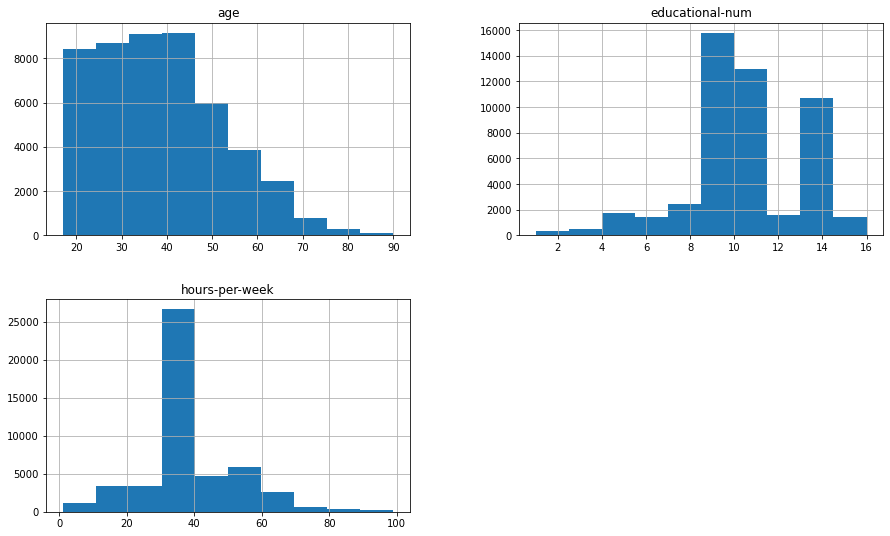

In [8]:
#plotting histograms of the numerical values
df.hist(figsize=(15,9))

In [9]:
#Now I want to look at categorical columns
df.describe(include=["O"])

,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,16,7,15,6,5,2,42,2
top,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,15784,22379,6172,19716,41762,32650,43832,37155


Few things we can take away from this as well. Most notable is that the most frequent responder to the survey could be categorized as a White, Married, Male from the US with a HS-grad level education, who makes under 50k a year

The first relationship I want to look at deeper is how age effects income.

In [41]:
df.groupby('age')['income'].describe()

,count,unique,top,freq
age,,,,
17,595,1,<=50K,595
18,862,1,<=50K,862
19,1053,2,<=50K,1050
20,1113,2,<=50K,1112
21,1096,2,<=50K,1090
22,1178,2,<=50K,1161
23,1329,2,<=50K,1307
24,1206,2,<=50K,1162
25,1195,2,<=50K,1119


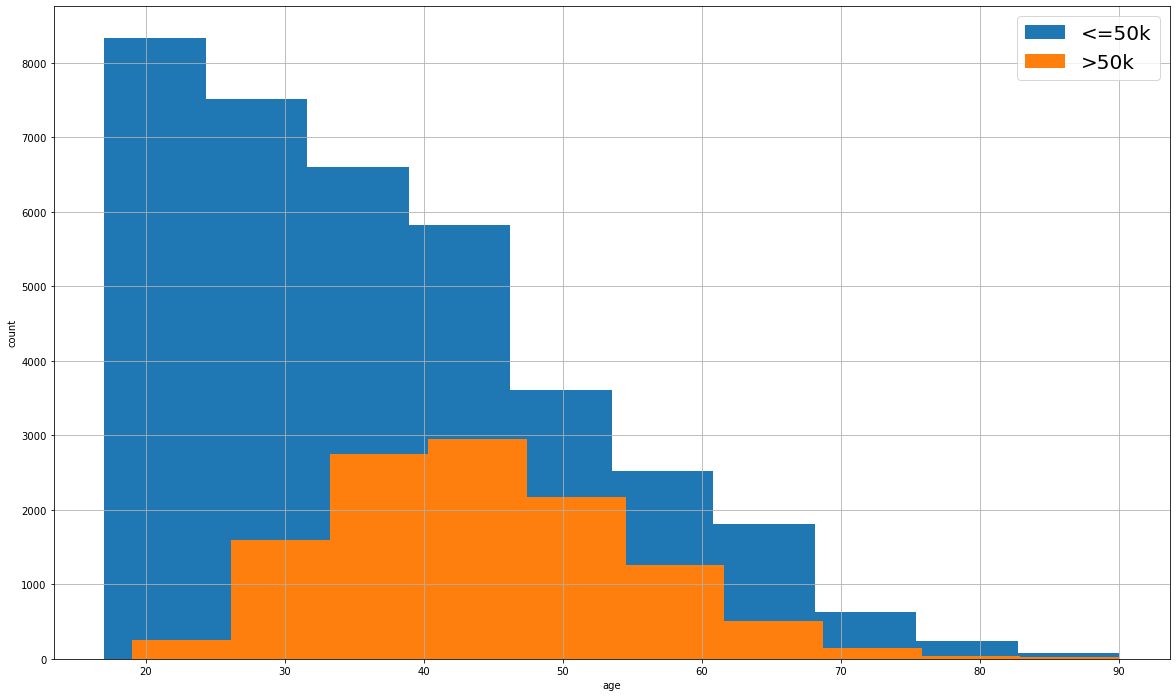

In [11]:
fig, ax = plt.subplots(figsize=(20,12))

df.groupby('income')['age'].hist()
plt.ylabel('count')
plt.xlabel('age')

plt.legend(['<=50k', '>50k'],fontsize = 20, loc = 'upper right')

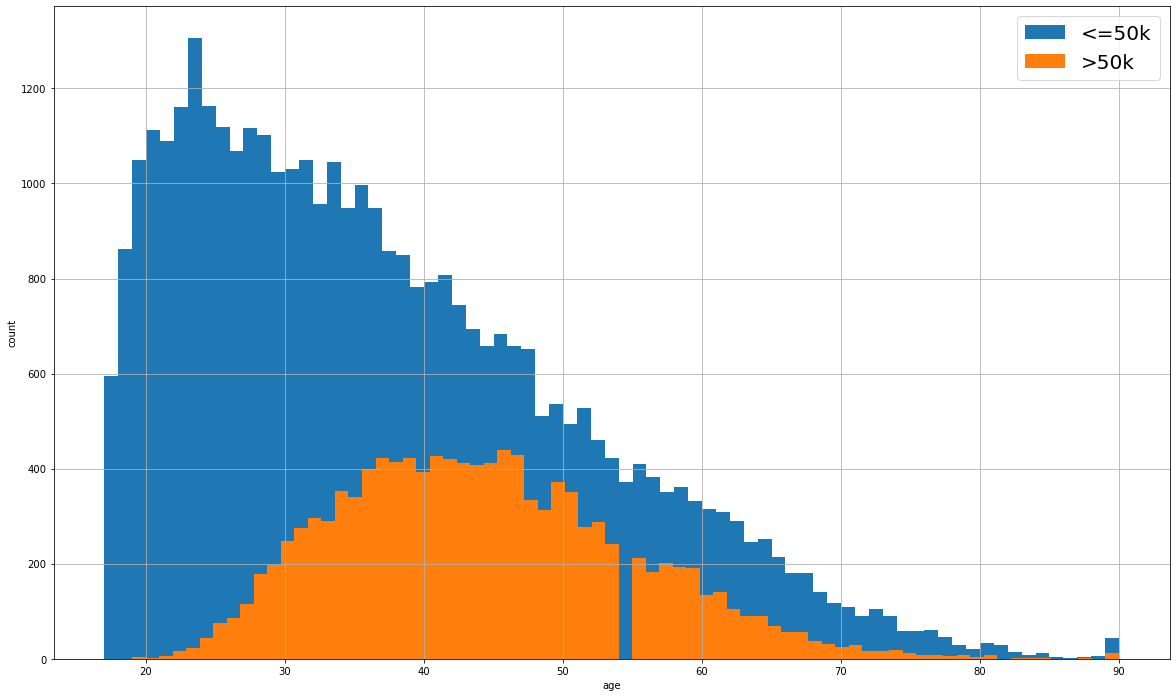

In [12]:
# same plot, except i used 73 bins because dataset contains info from age 17-90
# used to get a better idea of specific age trends

fig, ax = plt.subplots(figsize=(20,12))

df.groupby('income')['age'].hist(bins = 73) 
plt.ylabel('count')
plt.xlabel('age')

plt.legend(['<=50k', '>50k'],fontsize = 20, loc = 'upper right')

#interesting to see that this dataset has zero 55 year olds who make over 50k a year

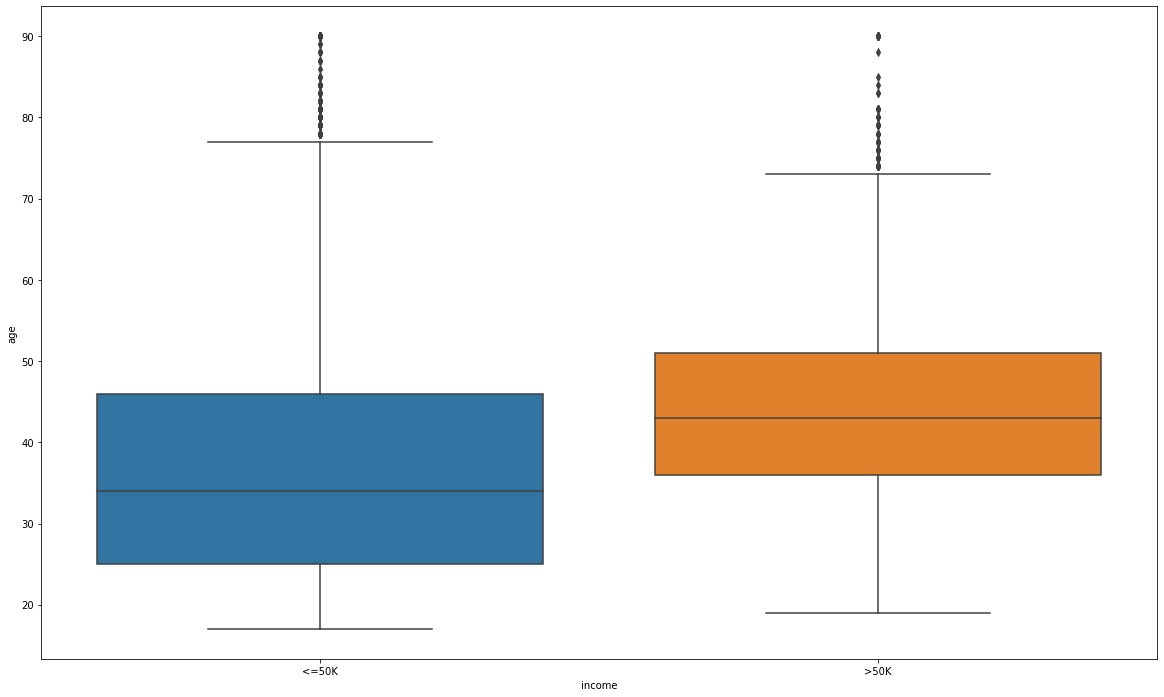

In [26]:
fig, ax = plt.subplots(figsize=(20,12))

sns.boxplot(x="income", y="age", data=df)
plt.show()

In [13]:
mean_over_50k_age = df[df["income"] ==">50K"]["age"].mean()
mean_under_50k_age = df[df["income"] =="<=50K"]["age"].mean()

In [14]:
print('The average age of someone who makes over 50k a year: ' + str(mean_over_50k_age) )
print('The average age of someone who makes under 50k a year: ' + str(mean_under_50k_age) )

The average age of someone who makes over 50k a year: 44.275177547702576
The average age of someone who makes under 50k a year: 36.87218409366169


We can see a few things from these graphs and from the average age of incomes. First thing We can see is that only 4 people under 20 years old made over 50k a year. It is not until after 20 years old do most people start to make more money. We also see that the amount of both incomes are increasing as people enter the workforce up until around age 24 or 25, then we see a linear relationship in that the older you get after 25, the chances you make under 50k decreases. The trend in these graphs also show that between ages 40-50 is roughly the peak of the over 50k earners graph, with the average age of over 50k earners right in the middle at 44.28 years old. My hypothesis that the older you are, the more money you make up until a certain point seems to hold true based on these graphs.

Now I want to look at the differences and correlations between a man's and woman's income

In [15]:
#grouping gender by income

df.groupby('gender')['income'].describe()

#seems the dataset contains about twice as many men as woman

,count,unique,top,freq
gender,,,,
Female,16192,2,<=50K,14423
Male,32650,2,<=50K,22732


In [16]:
#variables to add up how many men and woman surveyed earn 50k
woman_50k = 16192 - 14423
men_50k = 32650 - 22732

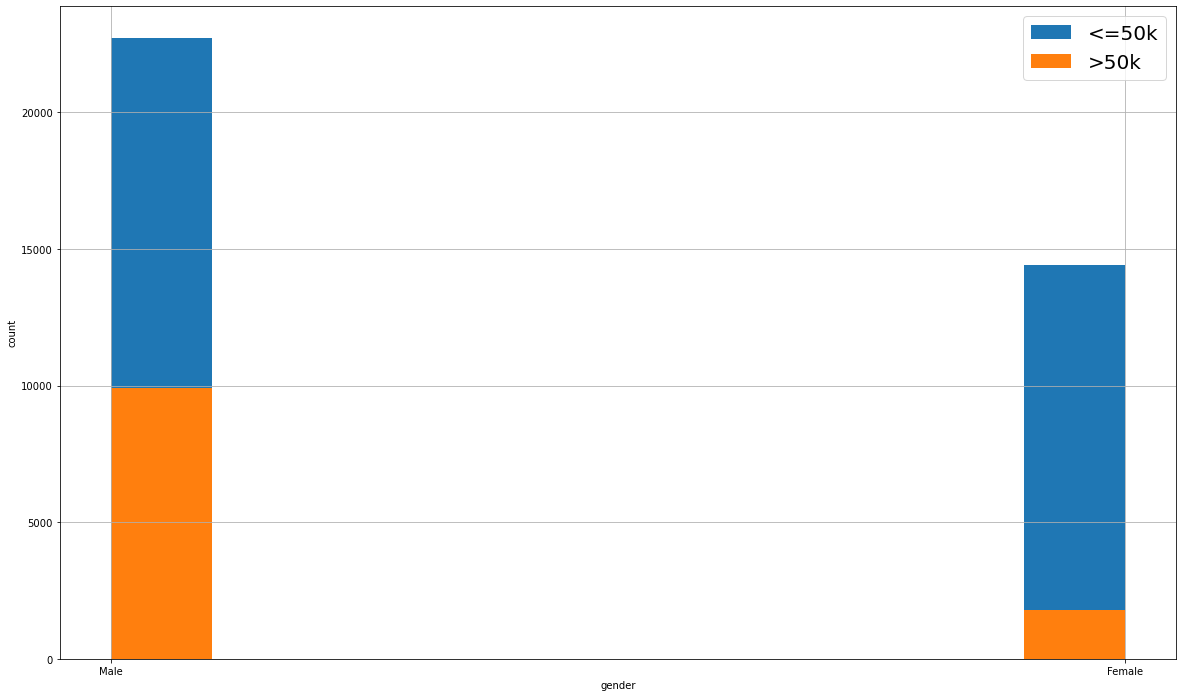

In [17]:
fig, ax = plt.subplots(figsize=(20,12))

df.groupby('income')['gender'].hist()
plt.ylabel('count')
plt.xlabel('gender')

plt.legend(['<=50k', '>50k'],fontsize = 20, loc = 'upper right')

In [18]:
print('The % of woman who earn over 50k a year is: ' + str((woman_50k / 16192) * 100) + '%')
print('The % of men who earn over 50k a year is: ' + str((men_50k / 32650) * 100) + '%')

The % of woman who earn over 50k a year is: 10.925148221343873%
The % of men who earn over 50k a year is: 30.37672281776417%


This graph is alarmingly skewed. We can see from this simple graph that less than 11% of woman make over 50k a year. This is in great contrast to men, where over 30% of men surveyed make over 50k. From this dataset we see that almost 3x as many men make over 50k than woman. As i hypothesized, men do clearly make more than woman, but I did not expect the difference to be this drastic.

Next, I want to also look at race to see how race factors in to earnings.

In [19]:
#grouping race by income

df.groupby('race')['income'].describe()

,count,unique,top,freq
race,,,,
Amer-Indian-Eskimo,470,2,<=50K,415
Asian-Pac-Islander,1519,2,<=50K,1110
Black,4685,2,<=50K,4119
Other,406,2,<=50K,356
White,41762,2,<=50K,31155


It seems the dataset contains way more white people surveyed than other races. White people account for over 85% of this survey. This actually may scew the data, because it is not totally representative of society in the 1990s ( when this data was collected)

In [20]:
#variables of how many people of that race earns over 50k
white_50k = 41762 - 31155
black_50k = 4685 - 4119
other_50k = 406 - 356
asian_50k = 1519 - 1110
eskimo_50k = 470 - 415

#race counts
white = 41762
black = 4685
other = 406
asian = 1519
eskimo = 470

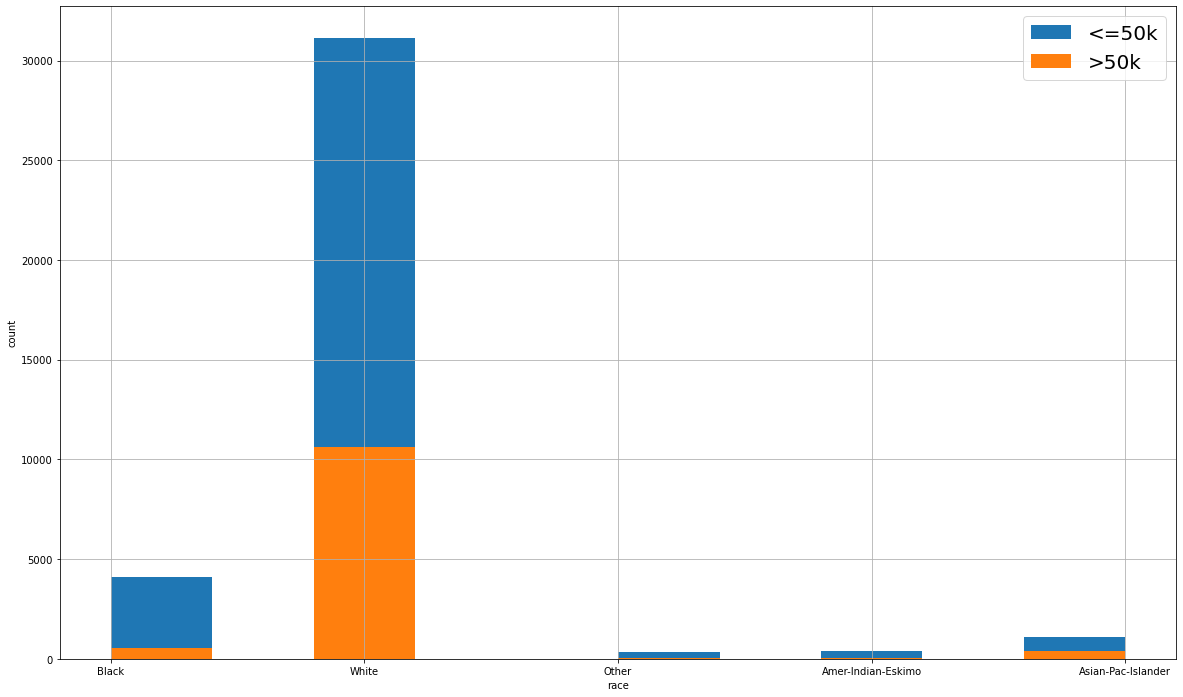

In [21]:
fig, ax = plt.subplots(figsize=(20,12))

df.groupby('income')['race'].hist()
plt.ylabel('count')
plt.xlabel('race')

plt.legend(['<=50k', '>50k'],fontsize = 20, loc = 'upper right')

In [22]:
print('The % of white people who earn over 50k a year is: ' + str((white_50k / white) * 100) + '%')
print('The % of black people who earn over 50k a year is: ' + str((black_50k / black) * 100) + '%')
print('The % of asian people who earn over 50k a year is: ' + str((asian_50k / asian) * 100) + '%')
print('The % of american-indian-eskimo people who earn over 50k a year is: ' + str((eskimo_50k / eskimo) * 100) + '%')
print('The % of other races who earn over 50k a year is: ' + str((other_50k / other) * 100) + '%')


The % of white people who earn over 50k a year is: 25.398687802308316%
The % of black people who earn over 50k a year is: 12.08110992529349%
The % of asian people who earn over 50k a year is: 26.925608953258724%
The % of american-indian-eskimo people who earn over 50k a year is: 11.702127659574469%
The % of other races who earn over 50k a year is: 12.31527093596059%


When it comes to race, we see a few trends here. First thing i notice that surprised me, was that white people did not have the highest percentage of people who earned over 50k like i hypothesized, but instead it was the asian-pac-islander race that had the highest % of people who earned over 50k, 26.93% vs 25.4% for white people. Both of these races have over a 2x advantage over the other 3 races of black, american-indian-eskimo, and other.

The last 2 relationships I want to explore in the data set is how both education and hours worked per week affects income. The first of these 2 that I will look at next is education. 

I previously hypothesized before fully understanding the dataset that hours worked per week would not have a totally linear relationship to income. My logic was that some people who make million work less than the average fast food worker. However, because this datasets 'income' variable is not a continuous numerical column reaching outlier levels, but rather a categorical column, I think this may affect my initial hypothesis. Because of this format, I believe outliers will not impact the dataset in the way I previously thought, so my revised hypothesis I am looking to test would predict that the people who make over 50k per year will on average work more than the people who make less than 50k.

In [42]:
df.groupby('hours-per-week')['income'].describe()

,count,unique,top,freq
hours-per-week,,,,
1,27,2,<=50K,24
2,53,2,<=50K,41
3,59,2,<=50K,56
4,84,2,<=50K,78
5,95,2,<=50K,86
6,92,2,<=50K,82
7,45,2,<=50K,38
8,218,2,<=50K,199
9,27,2,<=50K,24


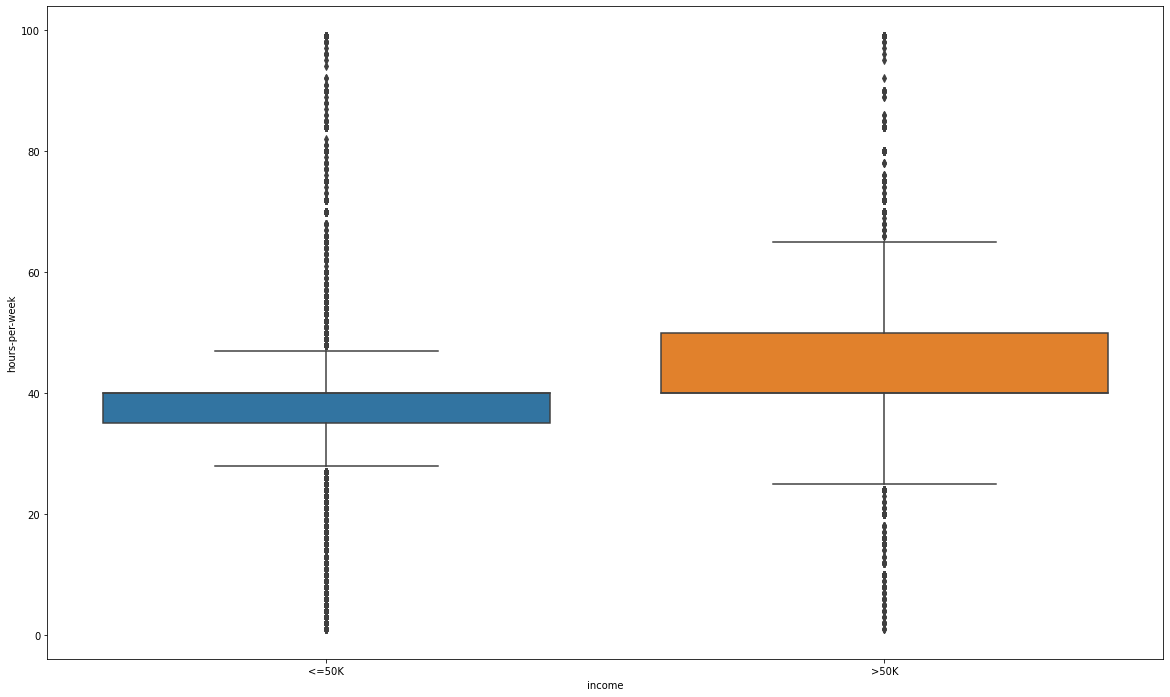

In [28]:
fig, ax = plt.subplots(figsize=(20,12))

sns.boxplot(x= df.income, y= df['hours-per-week'])
plt.show()

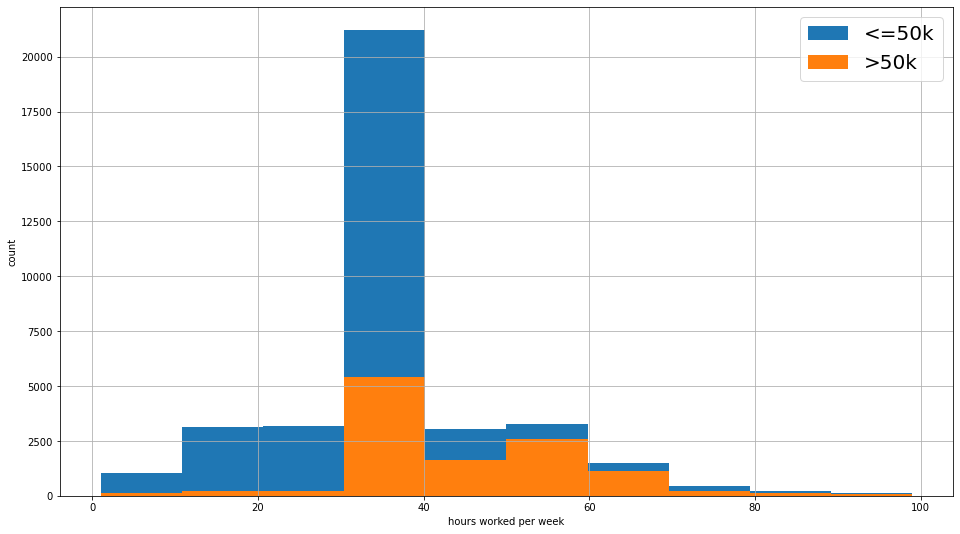

In [29]:
fig, ax = plt.subplots(figsize=(16,9))

df.groupby('income')['hours-per-week'].hist()
plt.ylabel('count')
plt.xlabel('hours worked per week')

plt.legend(['<=50k', '>50k'],fontsize = 20, loc = 'upper right')

From these graphs we can see a few things. First of all, around or exactly 40 hours per week is by far the most common number of hours worked per week. (Again, I do not believe someone is working 14 hours a day for 7 days a week to reach 99 hours worked at the far right of that, so I am considering this an error in the dataset or a lie. However, overall this does not effect the other thousands of datapoints in the graph.)

Another takeaway is that the average person who makes over 50k a year works more (on average) than the average under 50k earner. The percentage of people who make over 50k increase by a huge amount when the number of hours worked increases to over 40 hours per week. People who work more are expected to make more. This is simple logic and the data seems to prove that. I believe that if this dataset reported a continous number for income, the number of hours worked relative to income would look much different

The final variable that I want to look at is education level and how it will effect income. I think it will be pretty obvious that the higher level of education you have, the more money you should make. I will be looking at education- num, which is just a number between 1-16 that equals your education level. A higher level means more years of school.

In [39]:
#grouping education by income

df.groupby('education')['income'].describe()

,count,unique,top,freq
education,,,,
10th,1389,2,<=50K,1302
11th,1812,2,<=50K,1720
12th,657,2,<=50K,609
1st-4th,247,2,<=50K,239
5th-6th,509,2,<=50K,482
7th-8th,955,2,<=50K,893
9th,756,2,<=50K,715
Assoc-acdm,1601,2,<=50K,1188
Assoc-voc,2061,2,<=50K,1539


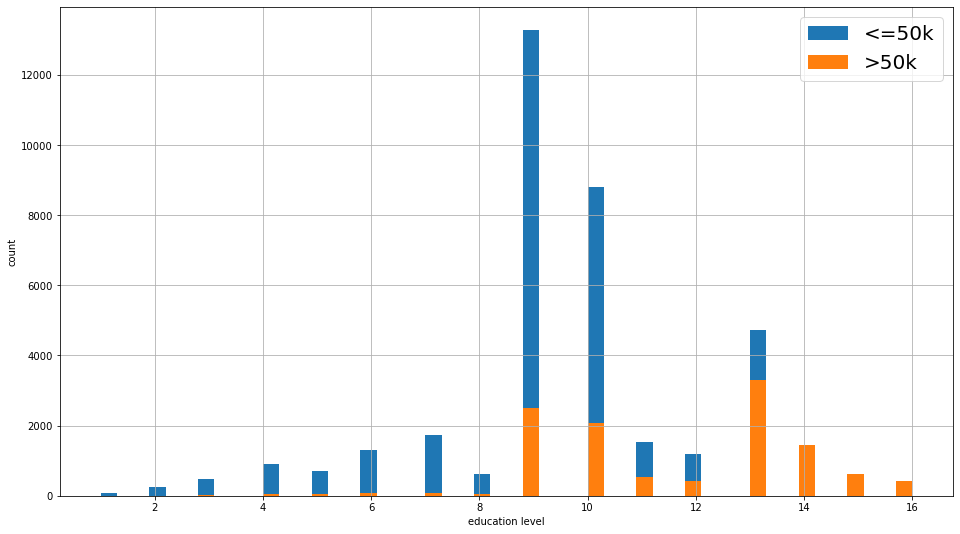

In [35]:
fig, ax = plt.subplots(figsize=(16,9))

df.groupby('income')['educational-num'].hist(bins = 50)
plt.ylabel('count')
plt.xlabel('education level')

plt.legend(['<=50k', '>50k'],fontsize = 20, loc = 'upper right')

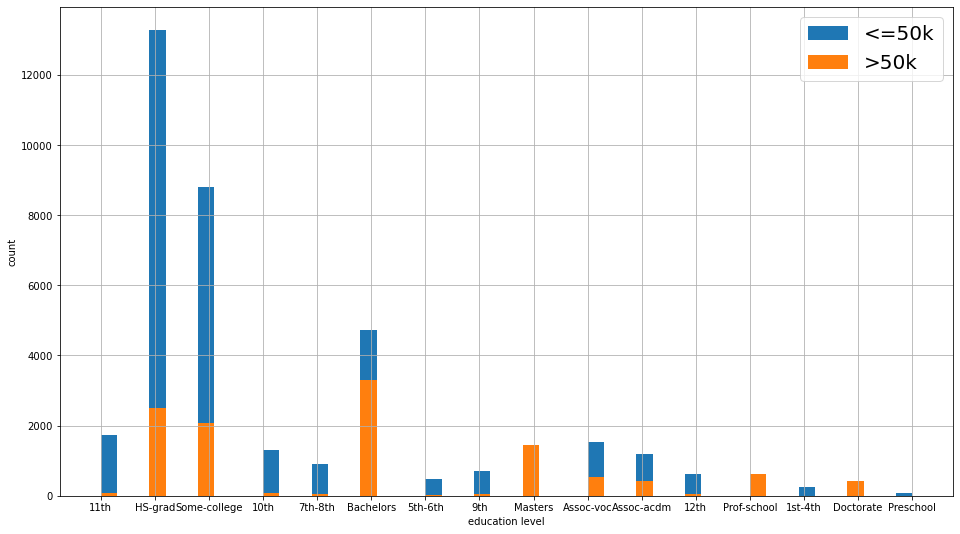

In [38]:
#Same plot, but using education labels instead of numbers
fig, ax = plt.subplots(figsize=(16,9))

df.groupby('income')['education'].hist(bins = 50)
plt.ylabel('count')
plt.xlabel('education level')

plt.legend(['<=50k', '>50k'],fontsize = 20, loc = 'upper right')

From these graphs, we can see the most frequent education levels are HS grad, followed by some college, and a bachelors degree third. However, from the graph above, we see a pretty obvious trend that the percentage of people who make over 50k increases the more education levels you have. It is not until you reach a masters degree level (educational-num of 14) in education are you more likely to make >50k rather than <50k, and that increases more for the prof-school and doctorate level of education. 

One thing I find interesting is that 83 people reported to have only a pre-school level of education, however 1 of the 83 reported to make over 50k per year still. I find this very interesting, as I believed it was illegal to not send your child to at least some schooling. How would someone every make over 50k and never learn to read or count or do math? Perhaps they won the lottery.

Overall this was an informative dataset that can tell a lot about income in the US in 1997 (when the data was collected).

Takeaways from this dataset:

-Several factors are completely random based on luck when it comes to income level (race, gender)

-Education level matters the most when it came to income level. (Other than a respondants who worked 61+ hours) No other variable I tested had over 50% of respondants make over 50k, except for the top 3 educational levels. Having a master's degree or above seems to be the best thing someone can do to make over 50k. But the more education level you have, the better chance you have to make over 50k

-Almost 3x as many men make over 50k on average, as opposed to woman. This is a very clear example of a the gender pay gap. Being a man in America obviously helps your income.

-Working more hours results in a better chance of making more than 50k a year. Put in that overtime! (the lowest number of hours the frequency of >50k earners surpassed <50k earners when it comes to numbers of hours worked is 61 hours per week. which is over 50% higher than the US average. I would hope someone who put in over 150% of the average hours worked would make over 50k!)

-The peak age for the likelyhood of someone making over 50k seems to be between 40-50. Most of very young and very old people have a much lower chance of making over 50k. The average age of someone who makes over 50k is 44.2

-White (25.4%) or Asian-Pac-Islander (26.9%) have over x2 the chance to make >50k compared to the other 3 classes polled (all under 12.3%)

-The ideal prototype to make over 50k a year in 1997 would be a: 44.2 year old, Asian-Pac-Islander, Male, with a doctorate degree, who works over 40 hours a week. Congratulations if you were lucky enough to be born one of them!